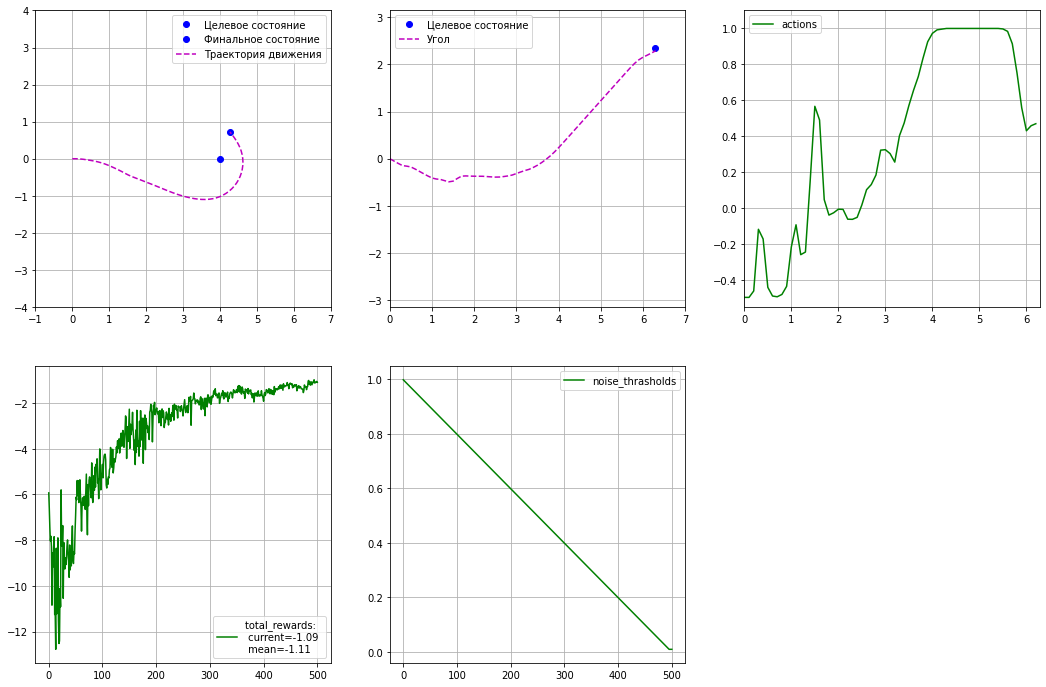

time: 230.71621322631836


In [5]:
import os, sys
sys.path.insert(0, os.path.abspath('..'))
import torch.nn as nn
import time
from Environments.DubinsCar.DubinsCar import DubinsCar
from Environments.DubinsCar.DubinsCarVisualizer import DubinsCarVisualizer
from Agents.DDPG import DDPG
from Agents.Utilities.SequentialNetwork import SequentialNetwork
from Agents.Utilities.Noises import OUNoise
from Solvers import OneAgentSolver as solver 
%load_ext autoreload
%autoreload 2

#learning parameters
episode_n = 501

#environment initialization
env = DubinsCar(dt=0.1, inner_step_n=1)

#agent initialization
q_model = SequentialNetwork([env.state_dim + env.action_dim, 256, 128, 1])
pi_model = SequentialNetwork([env.state_dim, 256, 128, env.action_dim], output_activation=nn.Tanh())
noise = OUNoise(action_dim=env.action_dim, threshold_decrease=1/episode_n)
agent = DDPG(env.action_min, env.action_max, q_model, pi_model, noise,
             q_model_lr=1e-3, pi_model_lr=1e-3, gamma=1, batch_size=128, tau=1e-2)

#learning
visualizer = DubinsCarVisualizer(waiting_for_show=50)
start_time = time.time()
solver.go(env, agent, episode_n=episode_n, show=visualizer.show)
print('time:', time.time() - start_time)